<center>
<img src = "https://drive.google.com/uc?export=view&id=1SGPsdjFUH5UU31wUD59HoL7g1jaHfwTX">
</center>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['clase'] = iris.target

In [4]:
df.clase.unique()

array([0, 1, 2])

In [20]:
colours = ['red', 'green','blue']
species = ['setosa', 'versicolor','virginica']
markers = ['x', 'o', '^']

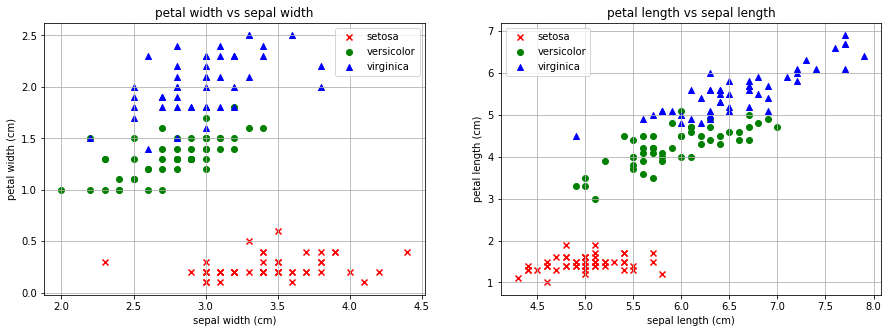

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for i in range(0, 3):    
    species_df = df[df['clase'] == i]    
    ax1.scatter(species_df['sepal width (cm)'],  species_df['petal width (cm)'] , marker = markers[i], color=colours[i], label=species[i])
    ax2.scatter(species_df['sepal length (cm)'], species_df['petal length (cm)'], marker = markers[i], color=colours[i], label=species[i])

ax1.set(xlabel='sepal width (cm)', ylabel='petal width (cm)')
ax1.set_title('petal width vs sepal width')
ax1.legend()
ax1.grid()

ax2.set(xlabel='sepal length (cm)', ylabel='petal length (cm)')
ax2.set_title('petal length vs sepal length')
ax2.legend()
ax2.grid()

plt.show()

In [7]:
X = df[['sepal length (cm)','sepal width (cm)', 'petal length (cm)','petal width (cm)']]

In [8]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, df["clase"], test_size=0.3, random_state=123)


In [10]:
clf = MLPClassifier(solver='sgd', alpha=0.0001, hidden_layer_sizes=(10,10), activation = 'relu', max_iter=300, random_state=123)

In [11]:
result = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [12]:
prediction = clf.predict(X_test)
print(prediction)

[1 2 2 1 0 2 1 0 0 2 1 0 1 2 2 2 0 0 2 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]


In [13]:
print(y_test.to_numpy())

[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]


In [14]:
print(metrics.accuracy_score(y_test, prediction))

0.9333333333333333


In [15]:
X_test['y_test'] = y_test
X_test['prediction'] = prediction

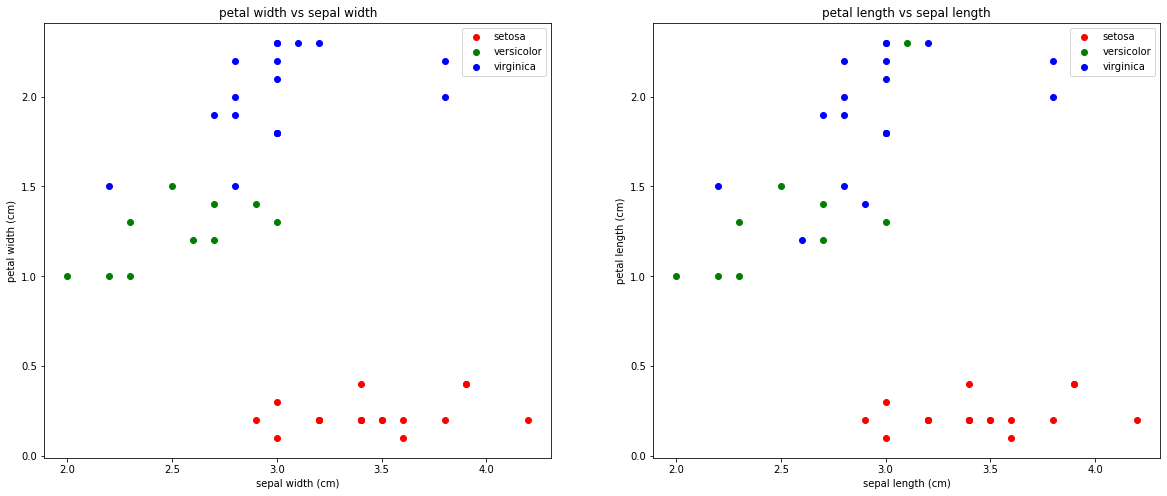

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
for i in range(0, 3):
  dfTest = X_test[X_test['y_test'] == i]    
  ax1.scatter( dfTest['sepal width (cm)'], dfTest['petal width (cm)'], color=colours[i], label=species[i] )
  dfPred = X_test[X_test['prediction'] == i]    
  ax2.scatter( dfPred['sepal width (cm)'], dfPred['petal width (cm)'], color=colours[i], label=species[i] )

ax1.set(xlabel='sepal width (cm)', ylabel='petal width (cm)')
ax1.set_title('petal width vs sepal width')
ax1.legend()

ax2.set(xlabel='sepal length (cm)', ylabel='petal length (cm)')
ax2.set_title('petal length vs sepal length')
ax2.legend()

plt.show()

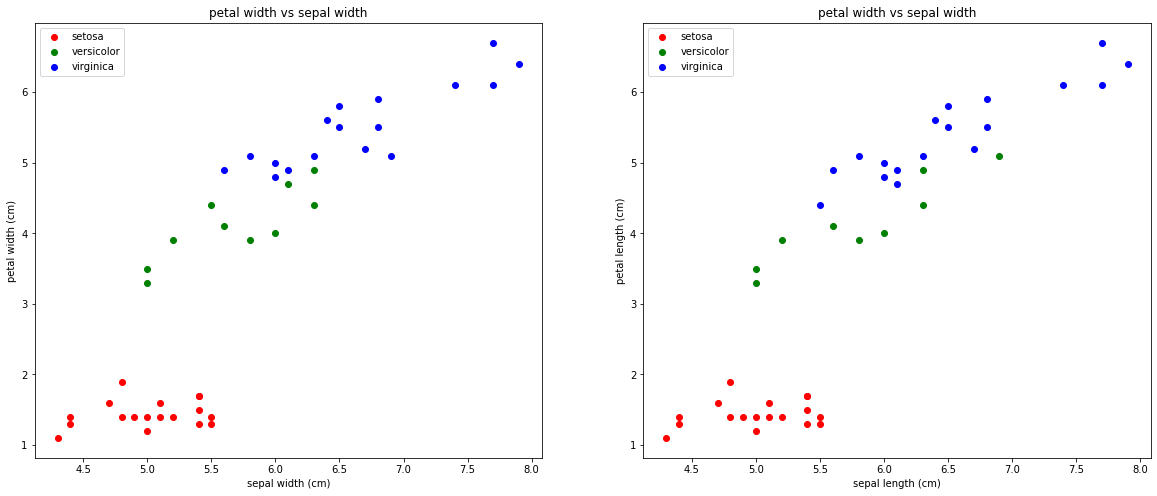

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
for i in range(0, 3):
  dfTest = X_test[X_test['y_test'] == i]    
  ax1.scatter( dfTest['sepal length (cm)'], dfTest['petal length (cm)'], color=colours[i], label=species[i] )
  dfPred = X_test[X_test['prediction'] == i]    
  ax2.scatter( dfPred['sepal length (cm)'], dfPred['petal length (cm)'], color=colours[i], label=species[i] )

ax1.set(xlabel='sepal width (cm)', ylabel='petal width (cm)')
ax1.set_title('petal width vs sepal width')
ax1.legend()

ax2.set(xlabel='sepal length (cm)', ylabel='petal length (cm)')
ax2.set_title('petal width vs sepal width')
ax2.legend()

plt.show()